### Image filtering
- 고주파 : 밝기 변화가 많은 곳 (경계선)
- 저주파 : 일반적인 배경
- 고주파 제거 : blur
- 저주파 제거 : 대상 영역 확인

- kernel(filter) = 행렬
- kernel의 크기가 클수록 blur 처리가 많이됨

In [2]:
import cv2
import numpy as np

def nothing(x):
    pass

img = cv2.imread('/Users/sejongpyo/downloads/yubi.jpg')

cv2.namedWindow('image')
cv2.createTrackbar('K', 'image', 1, 20, nothing)

while True:
    if cv2.waitKey(1) & 0xFF == 27:
        break
    k = cv2.getTrackbarPos('K', 'image')
    
    # (0, 0)은 에러 발생으로 1로 변환
    if k == 0:
        k = 1
        
    # by trackbar -> (1, 1) ~ (20, 20) kernel
    kernel = np.ones((k, k), np.float32)/(k*2)
    dst = cv2.filter2D(img, -1, kernel)
    
    cv2.imshow('image', dst)
cv2.destoryAllWindows()

AttributeError: module 'cv2.cv2' has no attribute 'destoryAllWindows'

### image blurring
- low-pass filter를 적용함
- 고주파영역 제거

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

###### averaging

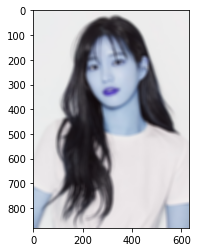

In [7]:
img = cv2.imread('/Users/sejongpyo/downloads/yubi.jpg')

dst = cv2.blur(img, (15, 15))

plt.imshow(dst)
plt.show()

###### Gaussian filtering
- 전체적으로 밀도가 동일한 노이즈, 백색노이즈)제거에 효과적임

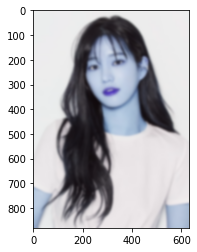

In [12]:
img = cv2.imread('/Users/sejongpyo/downloads/yubi.jpg')

dst = cv2.GaussianBlur(img, (25, 25), sigmaX = 0)
# 단, 커널은 양의 홀수만 가능

plt.imshow(dst)
plt.show()

###### Median filtering
- kernel window와 pixel 값 정렬 후 median 사용
- salt-and-pepper noise 제거에 효과적임

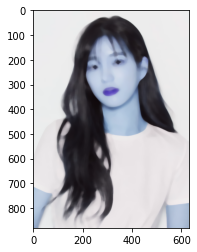

In [15]:
img = cv2.imread('/Users/sejongpyo/downloads/yubi.jpg')

# ksize는 1보다 큰 홀수
dst = cv2.medianBlur(img, 15)

plt.imshow(dst)
plt.show()

###### Bilateral filtering
- 양방향 필터는 경계선을 유지하며 Gaussian blur 처리
- 가우시간 필터 적용 후, 또 다시 주변 pixel까지 고려하여 적용

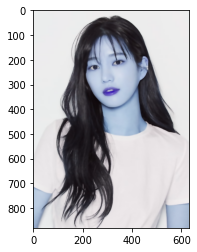

In [18]:
img = cv2.imread('/Users/sejongpyo/downloads/yubi.jpg')

# (src, filtering시 고려할 주변 pixel 지름, sigmaColor, sigmaSpace)
dst = cv2.bilateralFilter(img, 9, 75, 75)
# sigmacolor : 숫자가 크면 멀리 있는 색도 고려함
# sigmaSpace : 숫자가 크면 멀리 있는 pixel도 고려함

plt.imshow(dst)
plt.show()